In [7]:
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

In [8]:
start = "2021-9-29"
end = "2022-2-1"
# end = "2022-9-29"

In [9]:
df = pd.DataFrame()
ticker = pd.read_csv("predicted_data/2800.HK.nn.csv", index_col=0)
ticker.index = pd.to_datetime(ticker.index, format = '%Y-%m-%d')
df['close price'] = ticker['close'][start: end]
df['ground true'] = ticker['close'][start: end].shift(-1)

In [10]:
def loadPredicted(path):
    ticker = pd.read_csv(path, index_col=0)
    ticker.index = pd.to_datetime(ticker.index, format = '%Y-%m-%d')
    return ticker['predicted'][start: end]

In [11]:
paths = ['predicted_data/predicted-2800.HK_LSTM.csv',
 'predicted_data/2800result_Adaboost.csv',
 'predicted_data/RFpredicted-2800.HK-random-forest.csv',
 'predicted_data/Predicted_2800.HK_SVM.csv',
 'predicted_data/2800HK-Predict-ElasticNet.csv',
 'predicted_data/2800.HK.nn.csv']
model_names = [
    "LSTM",
    "Adaboost",
    "RandomForest",
    "SVM",
    "ElasticNet",
    "ANN"
]

LSTM mae: 0.22944121916666674
LSTM acc: 0.5058823529411764
Adaboost mae: 0.23544071904761915
Adaboost acc: 0.5176470588235295
RandomForest mae: 0.2902131961904763
RandomForest acc: 0.4823529411764706
SVM mae: 0.22944121916666674
SVM acc: 0.5058823529411764
ElasticNet mae: 0.23033938690476222
ElasticNet acc: 0.49411764705882355
ANN mae: 0.255573555952381
ANN acc: 0.5647058823529412


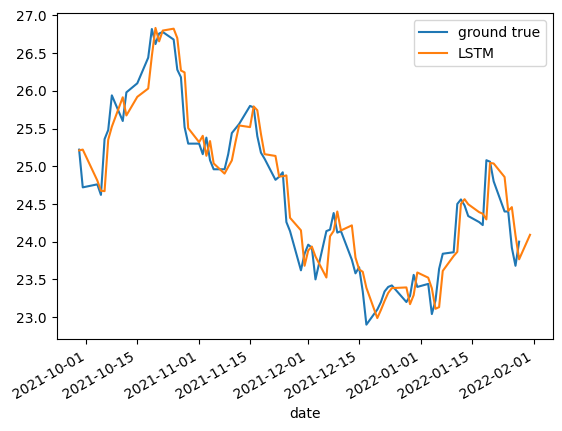

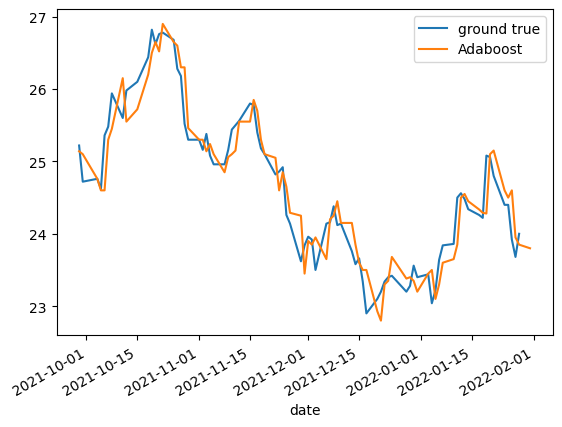

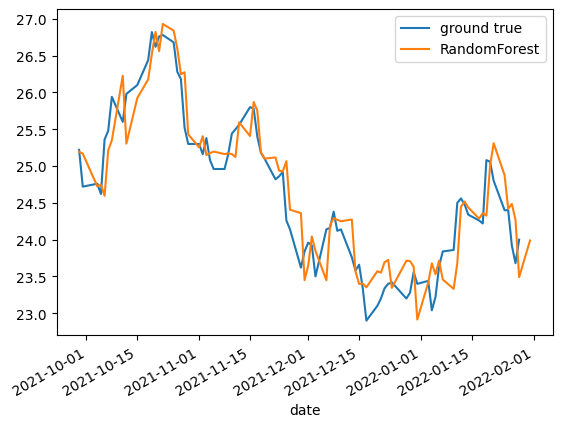

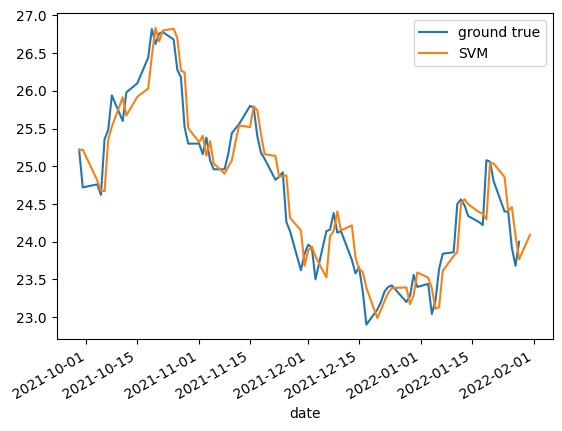

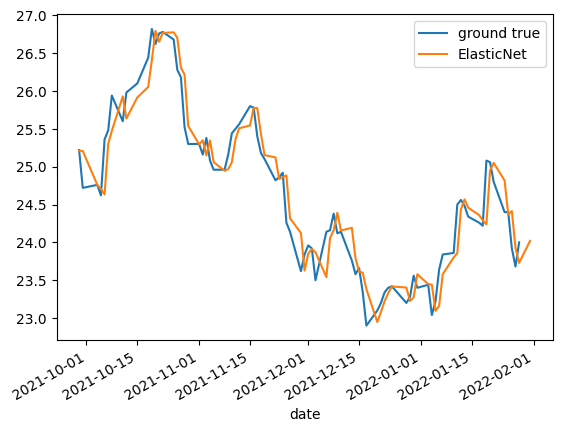

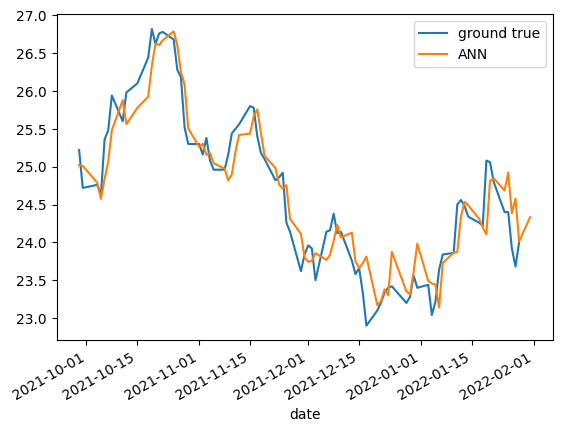

In [12]:
delta2 = df['ground true']-df['close price']
for i in range(len(paths)):
    predicted = loadPredicted(paths[i])
    model = model_names[i]
    df[model] = predicted
    print(f"{model} mae: {(df[model]-df['ground true']).abs().mean()}")
    delta = df[model]-df['close price']
    print(f"{model} acc: {(delta * delta2 > 0).mean()}")
    print("=================================")
    df[['ground true', model_names[i]]].plot()